In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sklearn.metrics.pairwise as pw

def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [6]:
# Load data for town called Ambridge
data_path = './data/Ambridge/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [7]:
def median(frame, group_index, avg_index):
    return(pd.Series(frame.groupby(group_index)[avg_index].median(), index=frame[group_index]))

display(reviews.head())
display(businesses.head())

businesses = businesses.dropna()
businesses_categories = pd.Series(businesses['categories'].values, index = businesses['business_id'])
for x in businesses_categories:
    if x == None:
        businesses_categories[x] = np.nan

for x in reviews:
    if x == None:
        reviews[x] = np.nan

businesses_categories = businesses_categories.dropna()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02
1,Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39
2,Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13
3,tuDIfqFjtj5zTLjtY9W1Hg,dUOg3fS3RTYDZUpu0CqqiA,729grSa1Wsn-hfv7D5uOxg,5.0,2,0,1,Police Station Pizza has always been my favori...,2014-10-28 18:29:48
4,zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,dJ0R-XT78LUQeNHQkD-G9g,Ice Cream Therapy,400 Merchant St,Ambridge,PA,15003,40.584100,-80.225135,3.5,3,1,None,"Food, Ice Cream & Frozen Yogurt","{'Monday': '15:0-22:0', 'Tuesday': '15:0-22:0'..."
1,3gL18eXylqutlzqb6TmB0w,Action Tire Company,304 Duss Ave,Ambridge,PA,15003,40.582380,-80.223875,5.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Smog Check Stations, Tires, Autom...","{'Monday': '6:30-16:0', 'Tuesday': '6:30-16:0'..."
2,Q_0eGl-aElqHKukHvmLdwA,Nelia's Smokehouse,603 Duss Ave,Ambridge,PA,15003,40.587939,-80.224885,4.0,18,0,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'Fals...","Filipino, Food, Restaurants, Barbeque, Smokehouse","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."
3,Eu_zPTrNVAXkpdSxf7CJ2w,K & N Restaurant,755 Merchant St,Ambridge,PA,15003,40.588606,-80.229103,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."
4,Yjf0i2J9q52dYIT8UVGT3g,Heritage Floral Shoppe,663 Merchant St,Ambridge,PA,15003,40.587650,-80.228493,4.5,4,1,"{'BusinessParking': '{'garage': False, 'street...","Florists, Flowers & Gifts, Shopping","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ..."


In [8]:
def split_data(data, d = 0.75):

    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

In [9]:
df_ratings_training, df_ratings_test = split_data(reviews, d=0.9)

In [10]:
def pivot_ratings(df):
    return df.pivot_table(values='stars', columns='user_id', index='business_id')

def create_similarity_matrix_cosine(matrix):

    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

In [11]:
df_utility_ratings = pivot_ratings(reviews)
df_similarity_ratings = create_similarity_matrix_cosine(df_utility_ratings)
display(df_utility_ratings.head())
display(df_similarity_ratings.head())

user_id,-3uEQhR9MXaC5QTHJ4lraw,-9Y_03tqxxxaFrz5x-QZiw,00VGQdtbdvfYfxZIPniAqQ,01vXmAJKQ41PVi2wgYDiPA,0N91KZHstHSnKwJVRa2p2g,0WygCUOgOMxucwZsrYru9w,135DbbQnr3BEkQbBzZ9T1A,1gJw6DxTrf0Zmp9gDgYlrQ,1kcOj0Ch394fLiUaC_fD9g,1q47TqjCRH92PhXIA9t9kA,...,wqrkoO4OISQ9LudoQhbdXw,wvLzHjWKwkCuEzWdTVdiGg,xA4ERJDFuPDBg-0U_G3llg,xBK-ElArbwMaonFFAI4NAA,xP53fNYIx6ZNoTqSXrT5gQ,y4a_7xpbvRvCGwMNY4iRhQ,ymgPMjIYBhFoNoM8Q7wsMA,z7cR4xXpRrTV55LHDM9SBg,zgQBhM1KePf1iFphbJL3yA,zuAt2Htm1-AKs_fXuuOPcg
business_id,,,,,,,,,,,,,,,,,,,,,
-InU2nAbC9AuS-Um2Cowgw,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
0EyRe-VkW8gYxxZ7NCQXeQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_7lYF6P2cYKnSiPhhVyPQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3gL18eXylqutlzqb6TmB0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4mpSNvmyG89Uqy2ahP4JMQ,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


business_id,-InU2nAbC9AuS-Um2Cowgw,0EyRe-VkW8gYxxZ7NCQXeQ,2_7lYF6P2cYKnSiPhhVyPQ,3gL18eXylqutlzqb6TmB0w,4mpSNvmyG89Uqy2ahP4JMQ,729grSa1Wsn-hfv7D5uOxg,7xRbOtZUuw7DxOWrHeaanw,EOmRHPvzR88a5R2j2uD0cQ,EZ9zSk4ld27LwgfANoF4VA,Eu_zPTrNVAXkpdSxf7CJ2w,...,lawYwEXAE-Sq2nf6co7aBg,muFJIZKZwbAfy_pEFKF_pw,pcbVl6ZHDOJHsnetY0rJEQ,rdHO0LkiNe6s3716hPuQXQ,tTDxa8OzmxUkpVifQ-cEWw,t_EiW3FlMnFTHyoeVU79xg,xM8dVGLkYaL94EuAIkjMEA,y3IVqEFHmrkgVKj2x1Ci4w,yyGzYDh0Qa2o8vUGMEjDRA,zBeUDwWx73QTZ34A1l0adQ
business_id,,,,,,,,,,,,,,,,,,,,,
-InU2nAbC9AuS-Um2Cowgw,1.000000,0.0,0.0,0.0,0.120519,0.077572,0.000000,-0.040735,-0.299120,-0.482982,...,0.0,-0.023804,0.0,0.0,0.018137,0.018176,0.067302,0.0,-0.11217,0.0
0EyRe-VkW8gYxxZ7NCQXeQ,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-0.970143,0.000000,0.000000,0.0,0.00000,0.0
2_7lYF6P2cYKnSiPhhVyPQ,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
3gL18eXylqutlzqb6TmB0w,0.000000,0.0,0.0,1.0,0.000000,0.100020,0.000000,0.173085,0.000000,0.077408,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,-1.0
4mpSNvmyG89Uqy2ahP4JMQ,0.120519,0.0,0.0,0.0,1.000000,-0.048359,-0.076209,0.000000,-0.402911,0.024951,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0


In [12]:
def extract_genres(business):

    genres_m = business.apply(lambda row: pd.Series([row['business_id']] + row['categories'].split(",")), axis=1)
    stack_genres = genres_m.set_index(0).stack()
    df_stack_genres = stack_genres.to_frame()
    df_stack_genres['business_id'] = stack_genres.index.droplevel(1)
    df_stack_genres.columns = ['categories', 'business_id']
    return df_stack_genres.reset_index()[['business_id', 'categories']]

def pivot_genres(df):

    return df.pivot_table(index = 'business_id', columns = 'categories', aggfunc = 'size', fill_value=0)

In [29]:
x = extract_genres(businesses)
df_utility_categories = pivot_genres(x)
display(df_utility_categories.head())

categories,American (New),American (Traditional),Appliances,Appliances & Repair,Arts & Entertainment,Auto Detailing,Auto Parts & Supplies,Automotive,Barbeque,Bars,...,Home Decor,Home Services,Italian,Local Services,Lounges,Mexican,Museums,Pizza,Restaurants,Southern
business_id,,,,,,,,,,,,,,,,,,,,,
-InU2nAbC9AuS-Um2Cowgw,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3gL18eXylqutlzqb6TmB0w,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4mpSNvmyG89Uqy2ahP4JMQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
729grSa1Wsn-hfv7D5uOxg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7xRbOtZUuw7DxOWrHeaanw,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)

In [30]:
df_similarity_categories = create_similarity_matrix_jaccard(df_utility_categories)
display(df_similarity_categories.head())

business_id,-InU2nAbC9AuS-Um2Cowgw,3gL18eXylqutlzqb6TmB0w,4mpSNvmyG89Uqy2ahP4JMQ,729grSa1Wsn-hfv7D5uOxg,7xRbOtZUuw7DxOWrHeaanw,EOmRHPvzR88a5R2j2uD0cQ,EZ9zSk4ld27LwgfANoF4VA,Eu_zPTrNVAXkpdSxf7CJ2w,GI1WxFbY9tJ9-ChRrwnrzg,KLptkOv3OiNSTU4unZv9Sg,...,TsusMt8MhyWaQOVL-MLnjA,XJfvPt-8f-6d5Foaz_HYLQ,Yjf0i2J9q52dYIT8UVGT3g,ftx72aqADrNYmOlMytdtCg,iJhb_2JL1uIbIRYUl41uVg,lawYwEXAE-Sq2nf6co7aBg,muFJIZKZwbAfy_pEFKF_pw,rdHO0LkiNe6s3716hPuQXQ,xM8dVGLkYaL94EuAIkjMEA,yyGzYDh0Qa2o8vUGMEjDRA
business_id,,,,,,,,,,,,,,,,,,,,,
-InU2nAbC9AuS-Um2Cowgw,1.0,0.0,0.000000,0.2,0.000000,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.285714,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0
3gL18eXylqutlzqb6TmB0w,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.000000,0.0,0.0,0.166667,0.0,0.00,0.000000,0.0,0.0
4mpSNvmyG89Uqy2ahP4JMQ,0.0,0.0,1.000000,0.0,0.166667,0.0,0.0,0.166667,0.20,0.142857,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.20,0.142857,0.0,0.0
729grSa1Wsn-hfv7D5uOxg,0.2,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.166667,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0
7xRbOtZUuw7DxOWrHeaanw,0.0,0.0,0.166667,0.0,1.000000,0.0,0.0,0.200000,0.25,0.166667,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.25,0.166667,0.0,0.0


In [31]:
def predict_ratings(similarity, utility, to_predict):

    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm

In [32]:
df_predicted_cf_item_based = predict_ratings(df_similarity_ratings, df_utility_ratings, df_ratings_test[['user_id', 'business_id', 'stars']])

In [33]:
display(df_predicted_cf_item_based.head())

,user_id,business_id,stars,predicted rating
3,dUOg3fS3RTYDZUpu0CqqiA,729grSa1Wsn-hfv7D5uOxg,5.0,5.0
27,1kcOj0Ch394fLiUaC_fD9g,Q_0eGl-aElqHKukHvmLdwA,5.0,5.0
28,LIHlbBXL5LsOyNpQVAU3lg,Eu_zPTrNVAXkpdSxf7CJ2w,5.0,5.0
39,sNtu3HsJ7_2nXRBz-3_dIA,Eu_zPTrNVAXkpdSxf7CJ2w,5.0,5.0
43,xBK-ElArbwMaonFFAI4NAA,Yjf0i2J9q52dYIT8UVGT3g,5.0,5.0


In [20]:
def mse(predicted_ratings):

    diff = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    return (diff**2).mean()

In [34]:
df_predicted_cf_item_based = predict_ratings(df_similarity_categories, df_utility_ratings, df_ratings_test[['user_id', 'business_id', 'stars']])
mse_categories = mse(df_predicted_cf_item_based)


print(f'mse for content based filtering: {mse_categories:.2f}')

mse for content based filtering: 0.70


In [35]:
def used(predictions, treshold):
    return predictions[predictions['stars'] >= treshold]
    
    
def unused(predictions, treshold):
    return predictions[predictions['stars'] < treshold]

In [36]:
def recommended(predictions, treshold):
    return predictions[predictions['predicted rating'] >= treshold]
    

def hidden(predictions, treshold):
    return predictions[predictions['predicted rating'] < treshold]

In [37]:
def confusion(recommended, hidden, used, unused):
    true_pos = recommended.index.intersection(used.index).size
    false_pos = recommended.index.intersection(unused.index).size
    true_neg = hidden.index.intersection(unused.index).size
    false_neg = hidden.index.intersection(used.index).size
    
    return pd.DataFrame({'used': [true_pos, false_neg], 'unused': [false_pos, true_neg]}, index = ['recommended', 'hidden'])

In [38]:
def precision(confusion_matrix):
    true_pos = confusion_matrix['used']['recommended']
    false_pos = confusion_matrix['unused']['recommended']
    
    return true_pos / (true_pos + false_pos)

In [39]:
def recall(confusion_matrix):
    true_pos = confusion_matrix['used']['recommended']
    false_neg = confusion_matrix['used']['hidden']
    
    return true_pos / (true_pos + false_neg)

In [40]:
def find_recall_precision(predictions, treshold_rec, treshold_us):
    conf_matrix = confusion(recommended(predictions, treshold_rec),
                           hidden(predictions, treshold_rec),
                           used(predictions, treshold_us),
                           unused(predictions, treshold_us))
    
    precision_val = precision(conf_matrix)
    recall_val = recall(conf_matrix)
    
    return precision_val, recall_val

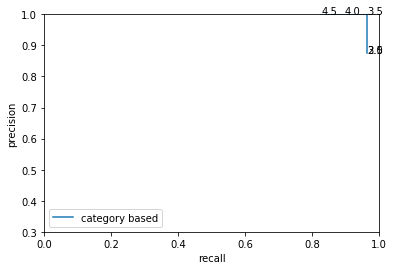

In [41]:
# predicted ratings categories
precisions = []
recalls = []
tresholds = [2.5, 3.0, 3.5, 4.0, 4.5]

# find the precision and recall values for set tresholds
for i in tresholds:
    prec, rec = find_recall_precision(df_predicted_cf_item_based, i ,4.0)
    
    precisions.append(prec)
    recalls.append(rec)
    
plt.plot(recalls, precisions)
for r, p, t in zip(recalls, precisions, tresholds):
    plt.text(r, p, t)    

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['category based', 'collaborative'], loc = 'lower left')